# Assignment 2

## Q1. Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

### Data-processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('ENB2012_data.xlsx')

df1 = pd.DataFrame(data)

# Display info about the DataFrame
df1.info()

# Print the number of null values in each column
print('\nNumber of null values in each column:')
print(df1.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

Number of null values in each column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


### Handling missing values

In [2]:
df2 = df1.dropna()
print(df2)
print('\nNumber of Null Values in each column:') 
df2.isna().sum()

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]

Number of Null Values in each column:


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### Correction between variables

The Correlation Matrix :


<Axes: >

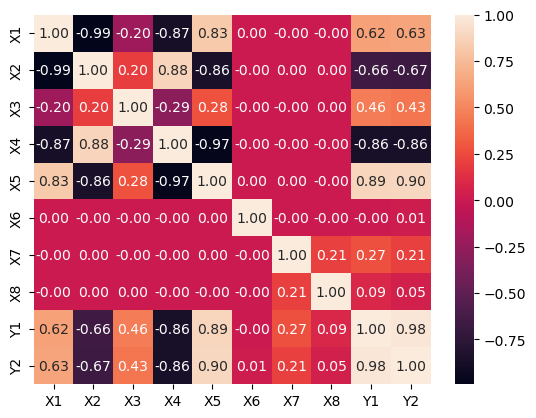

In [3]:
print("The Correlation Matrix :")
df2[df2.columns].corr()
sns.heatmap(data=df2[df2.columns].corr(), annot = True, fmt = ".2f")

### Outliner

In [4]:
mean = df2["Y1"].mean()
std = df2["Y1"].std()
print("Mean :", mean , "\nStd :", std)
upper_limit = mean + 3*std
lower_limit = mean - 3*std

# The outliners
df2[(df2["Y1"]<lower_limit) | (df2["Y1"]>upper_limit)]

Mean : 22.3071953125 
Std : 10.090203970187025


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


## Q2. Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [5]:
from sklearn.model_selection import train_test_split
features_col = ['X1','X2','X4','X5','X7']
target_col = ['Y1']
x = df2[features_col]
y = df2[target_col]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=64, test_size=0.2)
print('X Train :\n', x_train.head())
print('\nY Train :\n', y_train.head())
print('\nX Test :\n', x_test.head())
print('\nY Test :\n', y_test.head() ,'\n')

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

print('Shape of x_train :', x_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of x_test :', x_test.shape)
print('Shape of y_test :', y_test.shape)

X Train :
        X1     X2     X4   X5    X7
588  0.82  612.5  147.0  7.0  0.40
128  0.69  735.0  220.5  3.5  0.10
443  0.86  588.0  147.0  7.0  0.25
644  0.76  661.5  122.5  7.0  0.40
127  0.71  710.5  220.5  3.5  0.10

Y Train :
         Y1
588  28.95
128  11.45
443  29.88
644  39.32
127  10.68

X Test :
        X1     X2     X4   X5    X7
270  0.71  710.5  220.5  3.5  0.10
445  0.82  612.5  147.0  7.0  0.25
93   0.62  808.5  220.5  3.5  0.10
670  0.62  808.5  220.5  3.5  0.40
236  0.62  808.5  220.5  3.5  0.10

Y Test :
         Y1
270  10.67
445  24.96
93   12.97
670  16.55
236  12.85 

Shape of x_train : (614, 5)
Shape of y_train : (614, 1)
Shape of x_test : (154, 5)
Shape of y_test : (154, 1)


## Q3. Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset.

### Multiple Linear Regression from Scratch

In [ ]:
# Using Y1 = b0 + b1X1 + b2X2 + b4X4 + b5X5 + b7*X7

def multilinear_regression(x, y):
    b0 = np.ones(x.shape[0])
    new_x = np.concatenate((b0.reshape(-1,1), x), axis = 1)
    beta = np.linalg.inv(new_x.T @ new_x) @ new_x.T @ y
    return beta

beta = multilinear_regression(x_train, y_train)
beta

In [ ]:
def prediction(x, beta):
    b0 = np.ones(x.shape[0])
    new_x = np.concatenate((b0.reshape(-1,1), x), axis = 1)
    predicted_value = new_x @ beta
    return predicted_value
predicted_y1 = prediction(x_test, beta)
ss_res = np.sum((predicted_y1 - y_test)**2)
ss_tot = np.sum((predicted_y1 - y_test.mean())**2)
R_sq = 1 - (ss_res/ss_tot)
mse = np.mean((predicted_y1 - y_test)**2)
print('R-squared Value =', R_sq)

### Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR = LinearRegression()
LR.fit(x_train, y_train)   #Training
y_pred_linear = LR.predict(x_test)  #Predicting

mse_linear = mean_squared_error(y_test, y_pred_linear)
R_sq_linear = r2_score(y_test, y_pred_linear)
print('Mean-squared Error =', mse_linear)
print('R-squared Value =', R_sq_linear)

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
R_sq_ridge = r2_score(y_test, y_pred_ridge)
print('Mean-squared Error =', mse_ridge)
print('R-squared Value =', R_sq_ridge)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
R_sq_lasso = r2_score(y_test, y_pred_lasso)
print('Mean-squared Error =', mse_lasso)
print('R-squared Value =', R_sq_lasso)

## Q.4 Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [ ]:
data = {
    'Metrics' : ['R2 Score', 'MSE', 'RMSE'],
    'Scratch' : [R_sq, mse, (mse)**0.5],
    'sklearn' : [R_sq_linear, mse_linear, (mse_linear)**0.5],
    'Ridge' : [R_sq_ridge, mse_ridge, (mse_ridge)**0.5],
    'Lasso' : [R_sq_lasso, mse_ridge, (mse_lasso)**0.5]
}
data = pd.DataFrame(data)
data = data.set_index('Metrics')
data

### Plotting figure

In [ ]:
plt.figure(figsize=(12, 6))

# Manual Model
plt.subplot(1,2,1)
plt.scatter(y_test, predicted_y1, alpha = 0.4, marker = 'o')
plt.title('Manual Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)

# Sklearn Model
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_linear, alpha = 0.4, marker = 'o', c='green')
plt.title('sklearn Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)

## Q5. Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

In [ ]:
correlation = df2.corrwith(df2['Y1'])
correlation